# Tools for generating cell placements

Although users are always welcomed to place their neuronal somata according to their own custom generated positions, BMTK provides several tools to facilitate this placement, including simple geometries and placement based on geometries or densities from \*.nrrd files. Units can be placed with a minimum distance between them (please see second part of this tutorial).

## Generate a cylindrical column of cell positions

This function places random locations uniformly within a cylinder or cylindrical ring. Note that 'y' is the vertical axis.

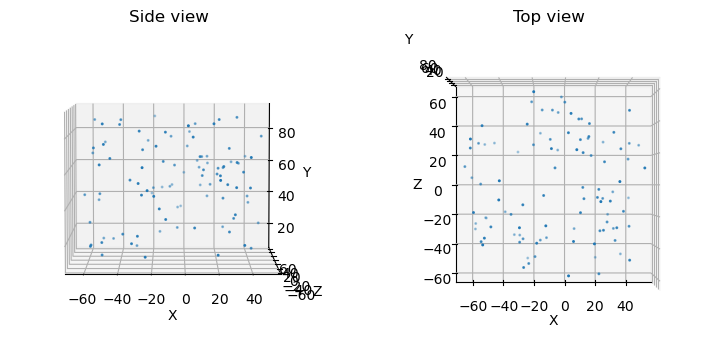

In [6]:
from bmtk.builder.auxi.node_params import positions_columnar

#positions = positions_columnar(400, center=[0.0, 50.0, 0.0], height=300.0, min_radius=0.0, max_radius=200,
#                        plot=True)
positions=positions_columnar(N=100, center=[0, 50.0, 0], max_radius=65.0, height=80.0,plot=True)

We can also use this function to create a cylindrical ring of locations. For instance, in the Allen V1 model, this method was used to introduce a surround of less computationally intensive unit types around the core of biophysically detailed units.

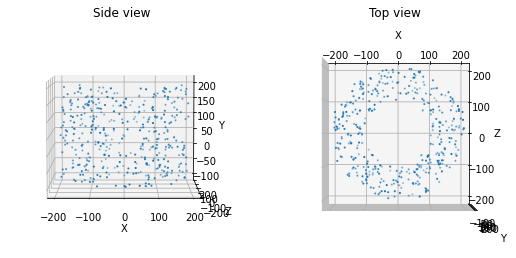

In [2]:
positions = positions_columnar(400, center=[0.0, 50.0, 0.0], height=300.0, min_radius=100.0, max_radius=200,
                        plot=True)

## Generate a rectangular prism volume of cell positions

Alternatively, if a sheet of cells (with some thickness) or other such geometry is desired, the following function can be used. 

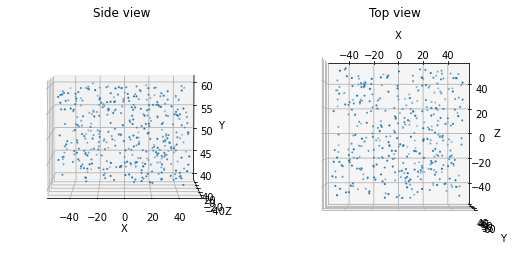

In [3]:
from bmtk.builder.auxi.node_params import positions_rect_prism

positions = positions_rect_prism(400, center=[0.0, 50.0, 0.0], height=20.0, x_length=100.0, z_length=100.0, plot=True)

## Generate an ovoid volume of cell positions
Lastly, if an ellipsoid is desired, e.g., to simulate a nucleus, one can use the following function:

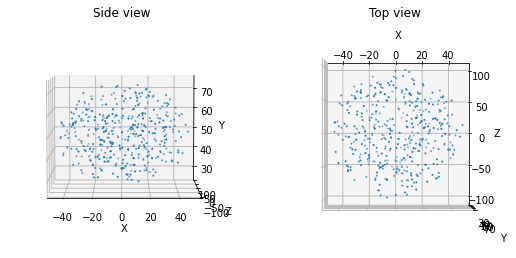

In [4]:
from bmtk.builder.auxi.node_params import positions_ellipsoid

positions = positions_ellipsoid (400, center=[0.0, 50.0, 0.0], height=50.0, x_length=100.0, z_length=200.0, plot=True)

## Generate random locations according to an Nrrd file 

We may want to place the units according to a file containing 3D location information, such as the [Allen Brain Atlas Common Coordinate Framework](https://help.brain-map.org/display/mouseconnectivity/API#API-DownloadAtlas3-DReferenceModels). You can obtain a structural mask that describes the extent of a structure of interest. Cells will be placed randomly within that structure at a density of max_dens. If the \*.nrrd file contains varying cell densities, this function can also be used to place cells randomly according to that density raster.

You will need to install the ```pynrrd``` library to use this function.

Note that the units of cell density are in cells/mm<sup>3</sup> while positions are in units of microns.

If the structure is bilateral and only one half is desired for modeling, you can specify the axis along which to split it.

positions: (102437, 3)


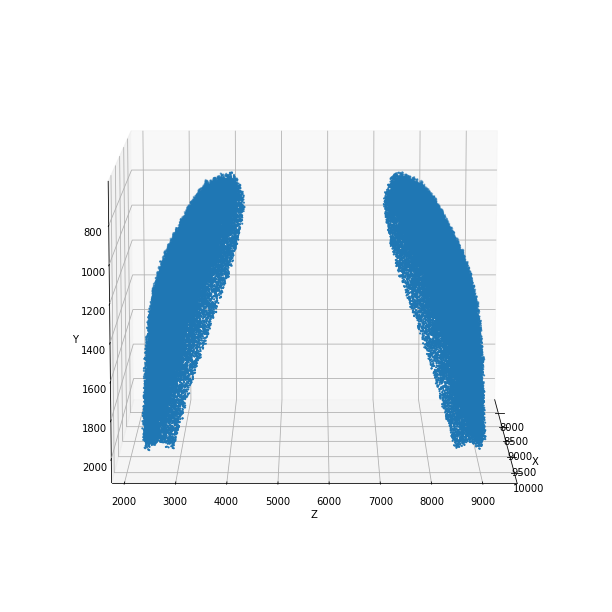

In [5]:
from bmtk.builder.auxi.node_params import positions_nrrd
filename = './sources/nrrd/structure_721.nrrd'
max_dens = 100000       # Cells per mm^3

positions = positions_nrrd(filename, max_dens, plot=True)

positions: (51218, 3)


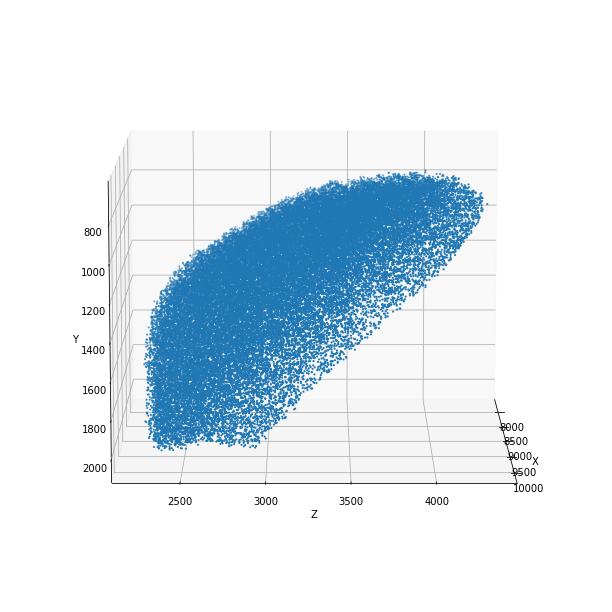

In [6]:
positions = positions_nrrd(filename, max_dens, split_bilateral='z', plot=True)

You can also directly use a 3-dimensional density matrix with the function ```positions_density_matrix``` to generate cell placements.

## Cell Placements with minimum distance between units

The same built-in placement options above are available now with a minimum distance enforced between cells. With the use of the cell placement object, multiple populations can be placed at the same time, but must use the same minimum distance, which is enforced between and within populations.

For a given minimum distance, there is a maximum density above which it will be physically impossible to pack the units. The functions will inform users of the packing limit for random close packing or hexagonal close packing. The default method is progressive sampling ('prog'), which iteratively replaces units that violate the minimum distance until the final density is achieved. As this can be slow to run when the requested density is near the packing limit, you may set `verbose` to True to monitor the progress. You may find that in such cases just slightly decreasing the dmin value significantly speeds up the run.

The alternative jittered lattice method ('lattice') may be faster at very high density and may allow you to slightly exceed the random close packing limit, but produces an unrealistic geometric regularity in order to achieve those densities.  

Density limit:206311.963
Max density requested:100000.000
5873/51218 cells placed
12009/51218 cells placed
17996/51218 cells placed
23656/51218 cells placed
28617/51218 cells placed
32939/51218 cells placed
36509/51218 cells placed
39492/51218 cells placed
41881/51218 cells placed
43671/51218 cells placed
45262/51218 cells placed
46550/51218 cells placed
47585/51218 cells placed
48535/51218 cells placed
49333/51218 cells placed
50050/51218 cells placed
50679/51218 cells placed
51226/51218 cells placed
51218 cells
positions: (51218, 3)


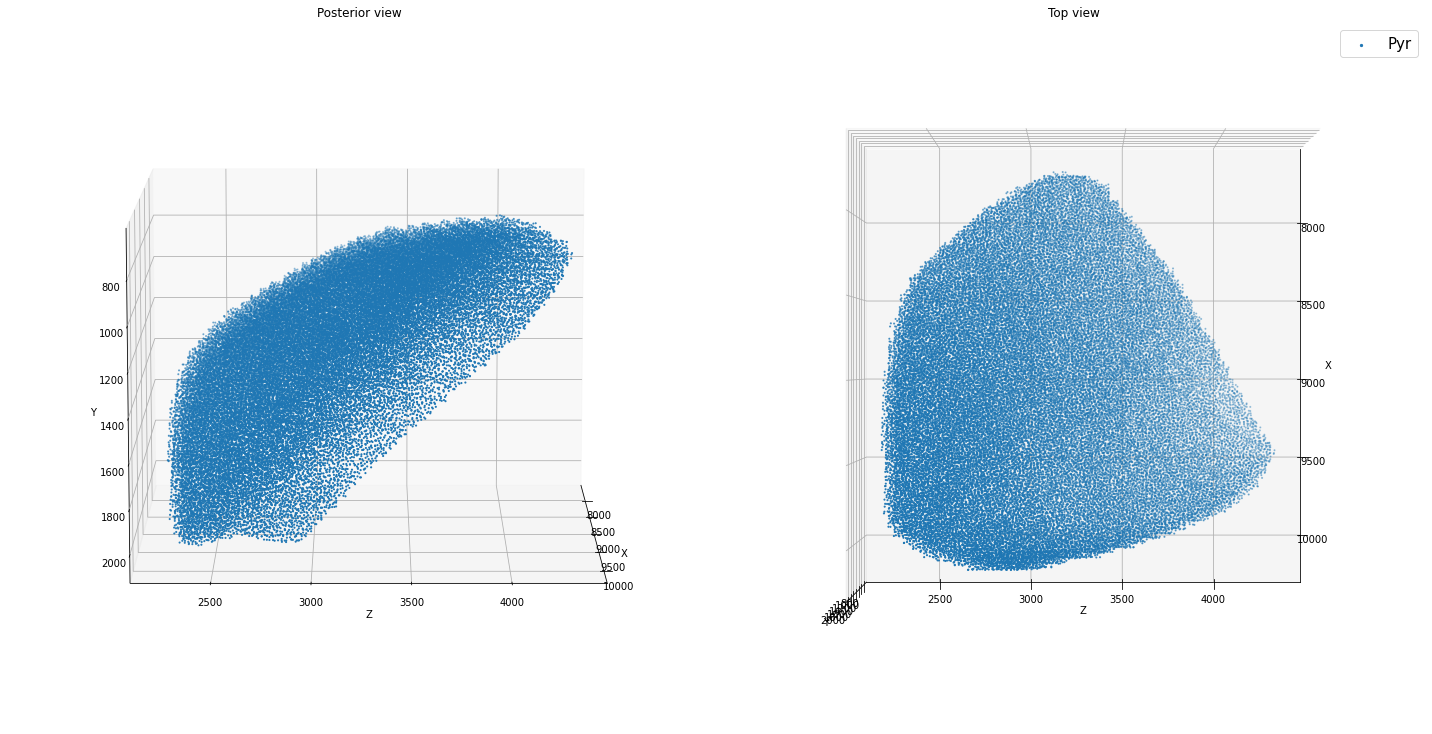

In [7]:
from bmtk.builder.auxi.node_params import CellLocations

filename = './sources/nrrd/structure_721.nrrd'

max_dens = 100000

ctx = CellLocations('cortex')
ctx.dmin = 18.0
ctx.CCF_orientation=True   # Use Allen Common Coordinate Framework orientation with y-axis as vertical

ctx.add_positions_nrrd(filename, max_dens, pop_names=['Pyr'], split_bilateral='z', method='prog', verbose=True)

ctx.plot_locs()

It is preferable to use partitioning (with the `pop_names` and `partitions` keywords) to place units by the same general rule into the same spatial structure. In the example below, the first call to `add_positions_nrrd()` assigns 85% of returned cells to Pyr and 15% to PV. However, you can also add placements iteratively (second call to `add_positions_nrrd()`).

Density limit:206311.963
Max density requested:50000.000
positions: (25609, 3)
Density limit:206311.963
Max density requested:50000.000
positions: (25609, 3)


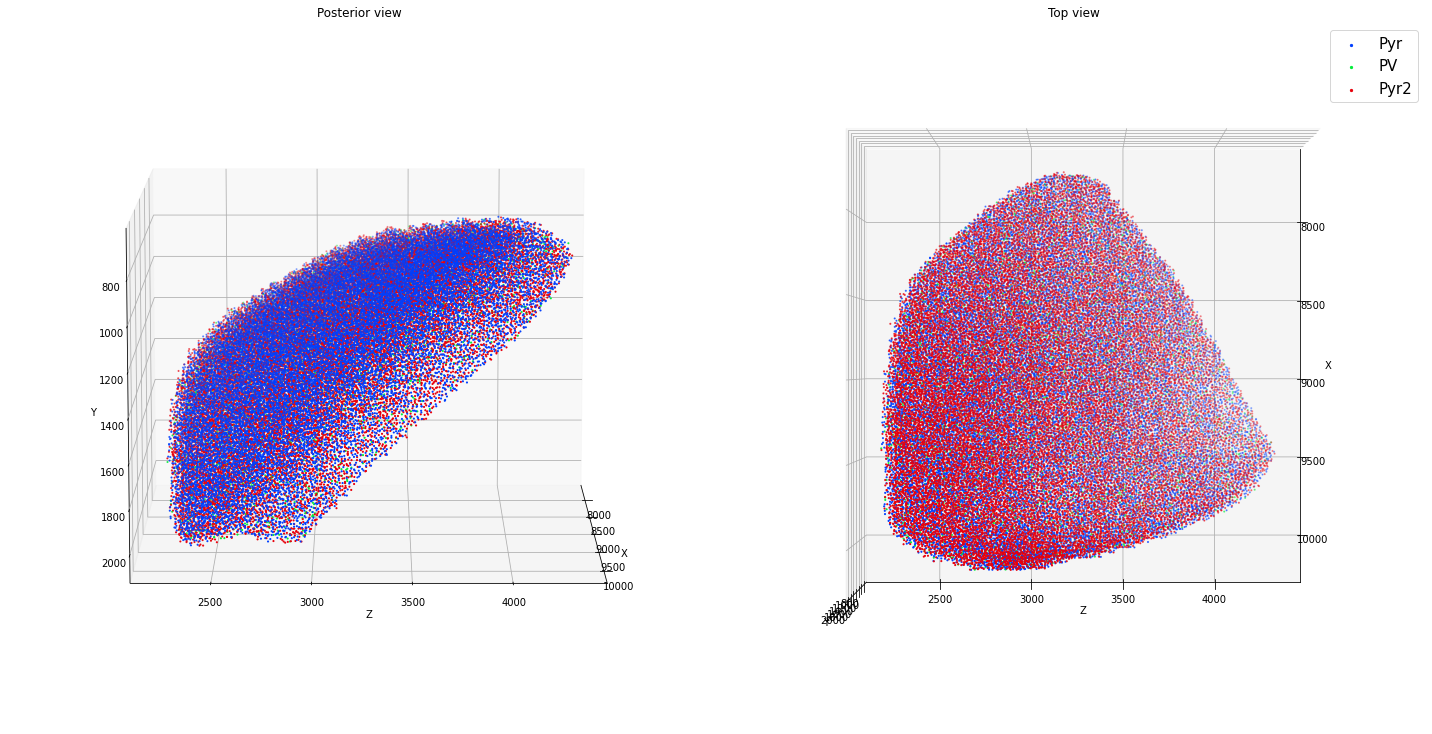

In [8]:
ctx = CellLocations('cortex')
ctx.dmin = 18.0
ctx.CCF_orientation=True   # Use Allen Common Coordinate Framework orientation with y-axis as vertical

ctx.add_positions_nrrd(filename, max_dens/2, pop_names=['Pyr','PV'], partitions=[0.85, 0.15], split_bilateral='z', 
                      method='prog', verbose=False)

ctx.add_positions_nrrd(filename, max_dens/2, pop_names=['Pyr2'], split_bilateral='z', method='prog', verbose=False)

ctx.plot_locs()

Again, you can slightly exceed the above packing limit or speed up placement at densities close to the packing limit by using a jittered lattice method. However, be aware that the resulting placements will have an artifactual regularity.

Density limit:176661.987
Max density requested:49999.268
positions: (25609, 3)


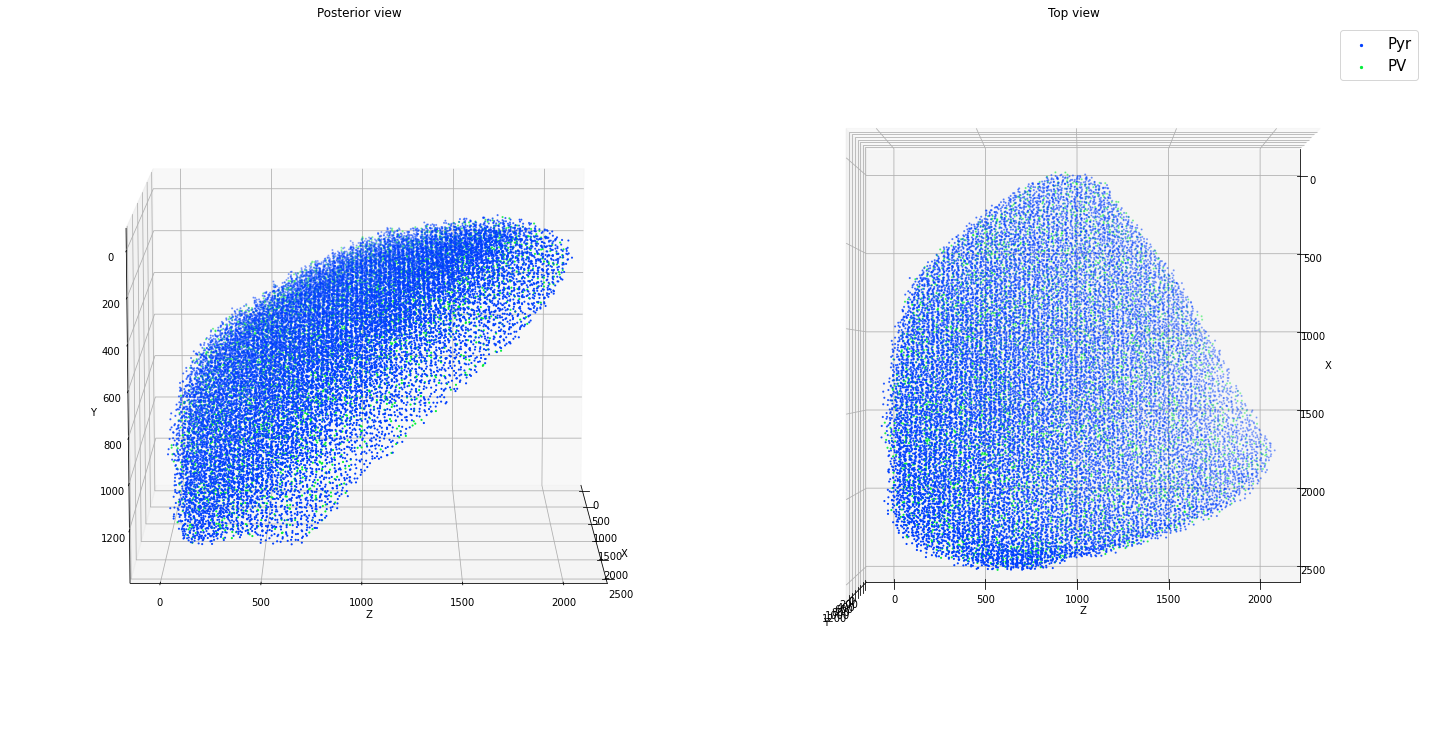

In [9]:
ctx = CellLocations('cortex')
ctx.dmin = 20.0
ctx.CCF_orientation=True   # Use Allen Common Coordinate Framework orientation with y-axis as vertical

ctx.add_positions_nrrd(filename, max_dens/2, pop_names=['Pyr','PV'], partitions=[0.85, 0.15], split_bilateral='z', 
                      method='lattice', verbose=False)

ctx.plot_locs()

Here are some more examples with simple geometries, not necessarily all realistic!

Density limit:206311.963
Max density requested:113176.848


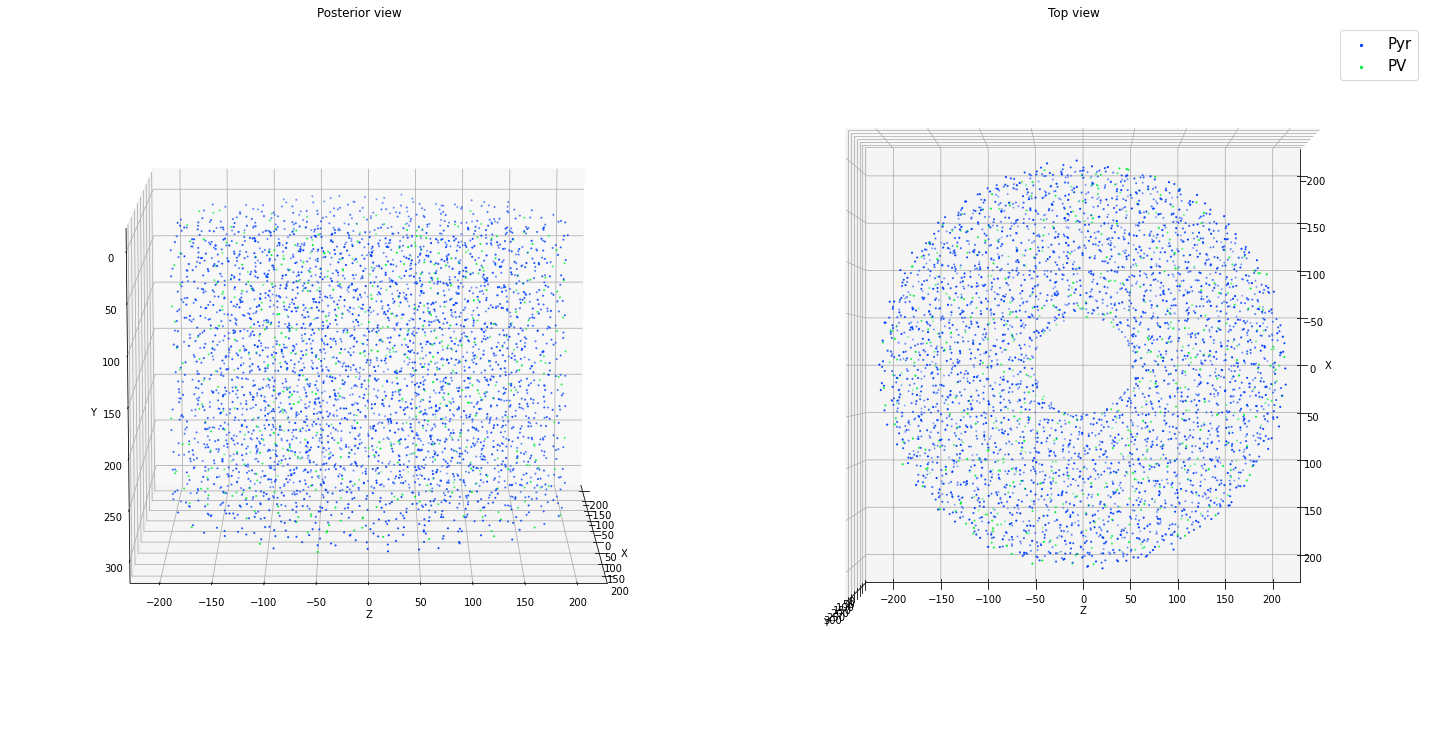

In [10]:
N=4000

ctx = CellLocations('ctx')
ctx.dmin = 18.0

ctx.add_positions_columnar(['Pyr','PV'], partitions=[0.85, 0.15], N=N, center=[0.0, 150.0, 0.0], height = 300.0,
                               min_radius = 50.0, max_radius = 200.0, method='prog', verbose=False)

ctx.plot_locs()

Density limit:206311.963
Max density requested:69444.444
Density limit:206311.963
Max density requested:70735.530


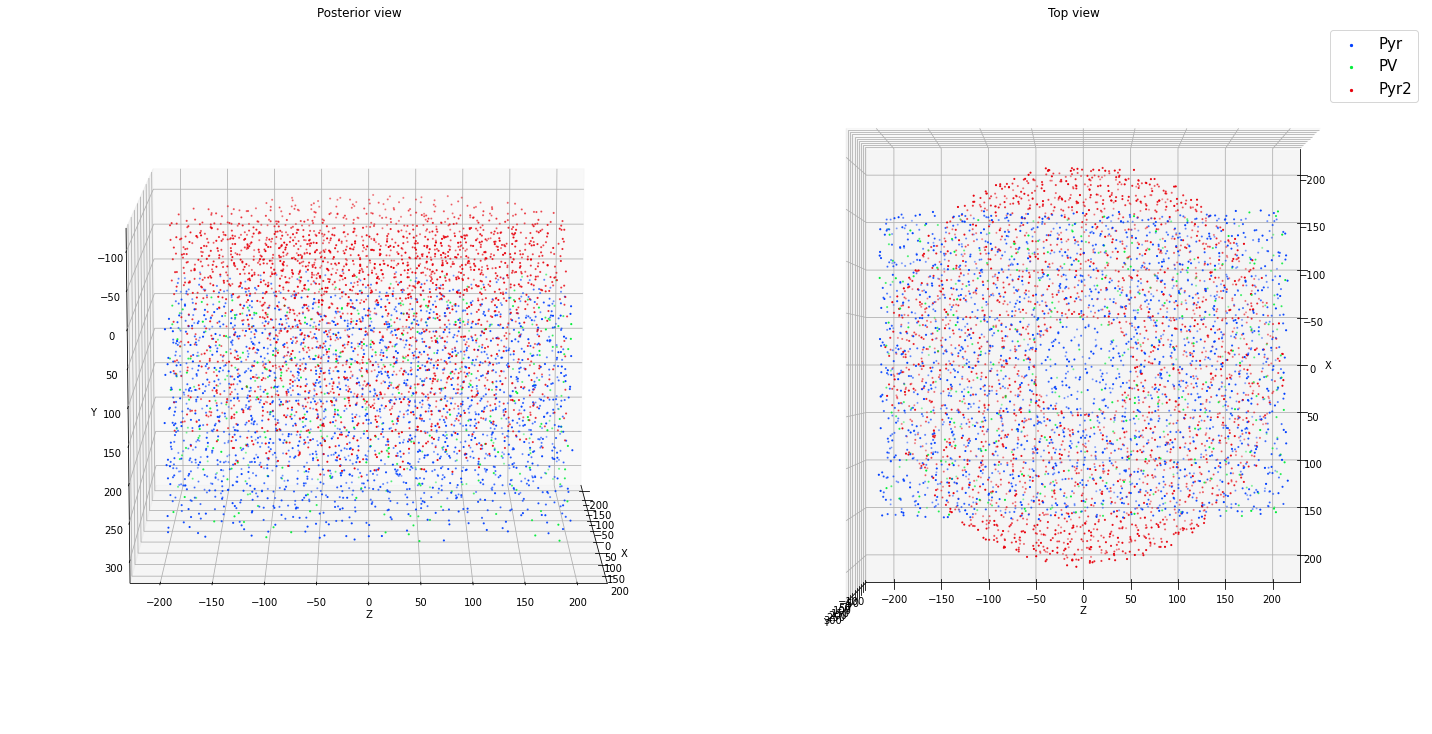

In [11]:
N=2500

ctx = CellLocations('cortex')
ctx.dmin = 18.0

ctx.add_positions_rect_prism(['Pyr','PV'], partitions=[0.85, 0.15], N=N, center=[0.0, 150.0, 0.0], height = 300.0,
                               x_length = 300.0, z_length = 400.0, method='prog', verbose=False)

ctx.add_positions_columnar('Pyr2', partitions=[1.0], N=N, center=[0.0, 50.0, 0.0], height = 300.0,
                               min_radius = 50.0, max_radius = 200.0, method='prog', verbose=False)

ctx.plot_locs()

Density limit:206311.963
Max density requested:127323.954


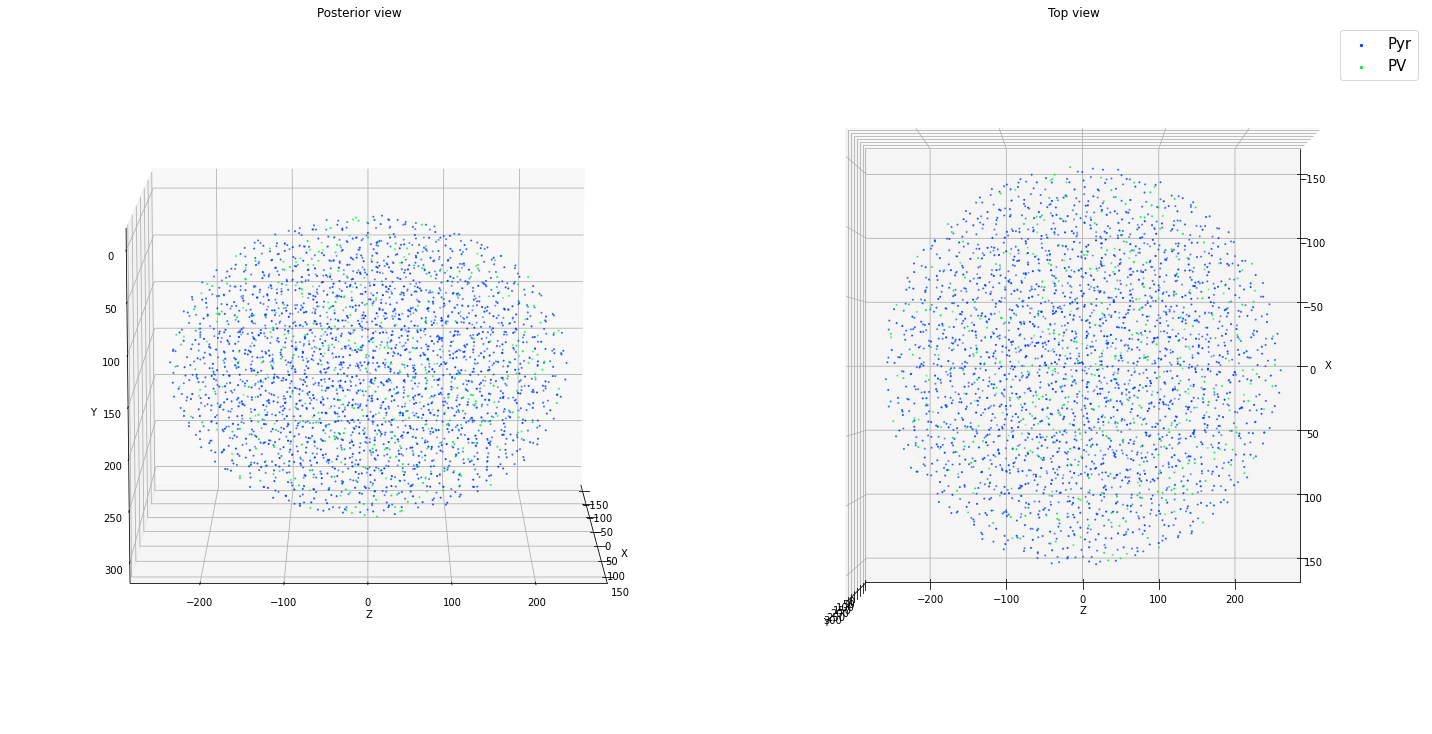

In [12]:
N=3000

ctx = CellLocations('cortex')
ctx.dmin = 18.0

ctx.add_positions_ellipsoid(['Pyr','PV'], partitions=[0.85, 0.15], N=N, center=[0.0, 150.0, 0.0], height = 300.0,
                               x_length = 300.0, z_length = 500.0, method='prog', verbose=False)
ctx.plot_locs()

Once we are satisfied with the placement, we can pass them to `add_nodes()` as follows (based on the ellipsoid example directly above):

In [13]:
from bmtk.builder.networks import NetworkBuilder

net = NetworkBuilder('cortex')
net.add_nodes(N=ctx.Pyr.N,
              positions=ctx.Pyr.positions,
              pop_name='Pyr', location='VisL4', ei='e',  # optional parameters
              model_type='point_process',  # Tells the simulator to use point-based neurons
              model_template='nest:iaf_psc_alpha',  # tells the simulator to use NEST iaf_psc_alpha models
              dynamics_params='472363762_point.json'  # File containing iaf_psc_alpha model parameters
             )

net.add_nodes(N=ctx.PV.N,
              positions=ctx.PV.positions,
              pop_name='PV', location='VisL4', ei='i',  # optional parameters
              model_type='point_process',  # Tells the simulator to use point-based neurons
              model_template='nest:iaf_psc_alpha',  # tells the simulator to use NEST iaf_psc_alpha models
              dynamics_params='472912177_point.json'  # File containing iaf_psc_alpha model parameters
             )